# Notebook 2 - Further EDA
Cohort Members:  Stephen Strawbridge, Nicholas Kovacs, Young Park, Chris Burger

This Notebook incorporates the same data cleaning seen in the main (protests) notebook but also includes further EDA.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

In [2]:
df = pd.read_csv("./data/protests.csv")

In [3]:
# Display all columns
pd.set_option('display.max_columns', None)

In [4]:
# Setting up target columns

dummy_drops = ['1_accomodation', '1_arrests', '1_beatings',
       '1_crowd dispersal', '1_ignore', '1_killings', '1_shootings',
       '2_accomodation', '2_arrests', '2_beatings', '2_crowd dispersal',
       '2_ignore', '2_killings', '2_shootings', '3_accomodation', '3_arrests',
       '3_beatings', '3_crowd dispersal', '3_ignore', '3_killings',
       '3_shootings', '4_accomodation', '4_arrests', '4_beatings',
       '4_crowd dispersal', '4_killings', '4_shootings', '5_.',
       '5_accomodation', '5_arrests', '5_beatings', '5_crowd dispersal',
       '5_killings', '5_shootings', '6_accomodation', '6_arrests',
       '6_beatings', '6_crowd dispersal', '6_killings', '7_.',
       '7_accomodation', '7_arrests', '7_beatings', '7_killings']

response = ["stateresponse1", "stateresponse2", "stateresponse3", "stateresponse4", "stateresponse5", "stateresponse6", "stateresponse7"]

#If there are no notes, then we will not be able to predict the outcome very well.
df.dropna(subset=["notes"], inplace=True) 

#For translating the vertical state response values laterally.
df = pd.get_dummies(data=df, prefix=["1", "2", "3", "4", "5", "6", "7"], columns=response)


#Combining the disparate dummies into unified response columns.  
#Unfortunately there was a certain amount of manual labor involved in this due to how finicky pandas is.
df["y_accomodation"] = df['1_accomodation'] + df['2_accomodation'] + df['3_accomodation'] + df['4_accomodation'] + df['5_accomodation'] + df['6_accomodation'] + df['7_accomodation']
df["y_arrests"] = df['1_arrests'] + df['2_arrests'] + df['3_arrests'] + df['4_arrests'] + df['5_arrests'] + df['6_arrests'] + df['7_arrests']
df["y_beatings"] = df['1_beatings'] + df['2_beatings'] + df['3_beatings'] + df['4_beatings'] + df['5_beatings'] + df['6_beatings'] + df['7_beatings']
df["y_crowd dispersal"] = df['1_crowd dispersal'] + df['2_crowd dispersal'] + df['3_crowd dispersal'] + df['4_crowd dispersal'] + df['5_crowd dispersal'] + df['6_crowd dispersal']
df["y_ignore"] = df['1_ignore'] + df['2_ignore'] + df['3_ignore']
df["y_killings"] = df['1_killings'] + df['2_killings'] + df['3_killings'] + df['4_killings'] + df['5_killings'] + df['6_killings'] + df['7_killings']
df["y_shootings"] = df['1_shootings'] + df['2_shootings'] + df['3_shootings'] + df['4_shootings'] + df['5_shootings']

#Getting rid of the disparate dummies now that we have unified responses.
df.drop(columns=dummy_drops, inplace=True)

In [5]:
df.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,sources,notes,y_accomodation,y_arrests,y_beatings,y_crowd dispersal,y_ignore,y_killings,y_shootings
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,15.0,1.0,1990.0,0.0,national,NaN,1000s,unspecified,"political behavior, process",labor wage dispute,NaN,NaN,1. Great Canadian train journeys into history;...,Canada s railway passenger system was finally...,0,0,0,0,1,0,0
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,25.0,6.0,1990.0,0.0,"Montreal, Quebec",NaN,1000,unspecified,"political behavior, process",NaN,NaN,NaN,1. Autonomy s Cry Revived in Quebec The New Yo...,protestors were only identified as young peop...,0,0,0,0,1,0,0
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,1.0,7.0,1990.0,0.0,"Montreal, Quebec",NaN,500,separatist Parti Quebecois,"political behavior, process",NaN,NaN,NaN,1. Quebec protest after Queen calls for unity ...,"THE Queen, after calling on Canadians to rema...",0,0,0,0,1,0,0
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,6.0,9.0,1990.0,1.0,"Montreal, Quebec",NaN,100s,Mohawk Indians,land farm issue,NaN,NaN,NaN,1. Indians Gather as Siege Intensifies; Armed ...,Canada s federal government has agreed to acq...,1,0,0,0,0,0,0
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,15.0,8.0,1990.0,1.0,"Montreal, Quebec",NaN,950,local residents,"political behavior, process",NaN,NaN,NaN,1. Dozens hurt in Mohawk blockade protest The ...,Protests were directed against the state due t...,1,1,0,1,0,0,0


In [6]:
# Changing types of year columsn to integers
df['year'] = df['year'].astype(int)
df['startyear'] = df['startyear'].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14468 entries, 0 to 16360
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14468 non-null  int64  
 1   country                14468 non-null  object 
 2   ccode                  14468 non-null  int64  
 3   year                   14468 non-null  int32  
 4   region                 14468 non-null  object 
 5   protest                14468 non-null  int64  
 6   protestnumber          14468 non-null  int64  
 7   startday               14468 non-null  float64
 8   startmonth             14468 non-null  float64
 9   startyear              14468 non-null  int32  
 10  endday                 14468 non-null  float64
 11  endmonth               14468 non-null  float64
 12  endyear                14468 non-null  float64
 13  protesterviolence      14468 non-null  float64
 14  location               14447 non-null  object 
 15  pa

In [8]:
# Description of the data
df.describe()

,id,ccode,year,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,y_accomodation,y_arrests,y_beatings,y_crowd dispersal,y_ignore,y_killings,y_shootings
count,1.446800e+04,14468.000000,14468.000000,14468.0,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000,14468.000000
mean,4.292593e+09,429.058750,2005.697401,1.0,8.084048,15.453829,6.160976,2005.697332,15.577620,6.178463,2005.700097,0.263132,0.103539,0.139480,0.053290,0.306193,0.549281,0.053152,0.059925
std,2.345207e+09,234.520679,8.699182,0.0,12.064508,8.830454,3.455532,8.699088,8.816642,3.455823,8.700431,0.440349,0.307157,0.347057,0.224926,0.465553,0.497722,0.224959,0.237357
min,2.019900e+08,20.000000,1990.000000,1.0,1.000000,1.000000,1.000000,1990.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.201992e+09,220.000000,1998.000000,1.0,2.000000,8.000000,3.000000,1998.000000,8.000000,3.000000,1998.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.732002e+09,373.000000,2007.000000,1.0,4.000000,15.000000,6.000000,2007.000000,16.000000,6.000000,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.452004e+09,645.000000,2014.000000,1.0,9.000000,23.000000,9.000000,2014.000000,23.000000,9.000000,2014.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,9.102017e+09,910.000000,2019.000000,1.0,143.000000,31.000000,12.000000,2019.000000,31.000000,12.000000,2019.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000


---
# Further EDA

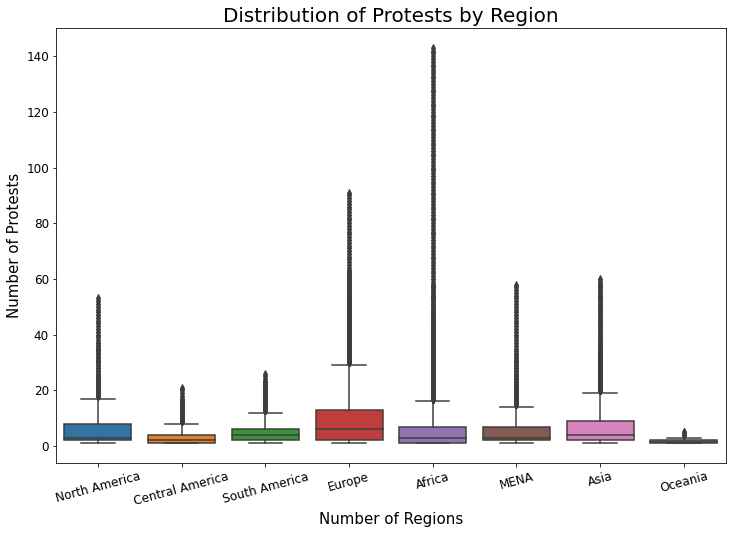

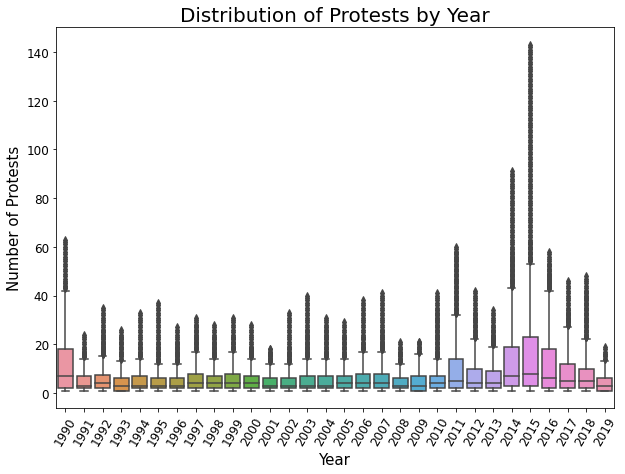

In [9]:
# Distribution of Protests by Region

plt.figure(figsize=(12,8))
plt.title('Distribution of Protests by Region', fontsize=20);
sns.boxplot(data=df, x='region', y='protestnumber')
plt.xlabel('Number of Regions',fontsize=15)
plt.ylabel('Number of Protests', fontsize=15)
plt.xticks(fontsize=12, rotation=15)
plt.yticks(fontsize=12)

# Distribution of Protests by Year

plt.figure(figsize=(10,7))
sns.histplot(data=df, x='startyear',y='protestnumber')
plt.xticks(fontsize=12, rotation=60)
plt.yticks(fontsize=12)
plt.title('Distribution of Protests by Year', fontsize=20)
sns.boxplot(data=df, x='startyear', y='protestnumber')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Protests', fontsize=15);

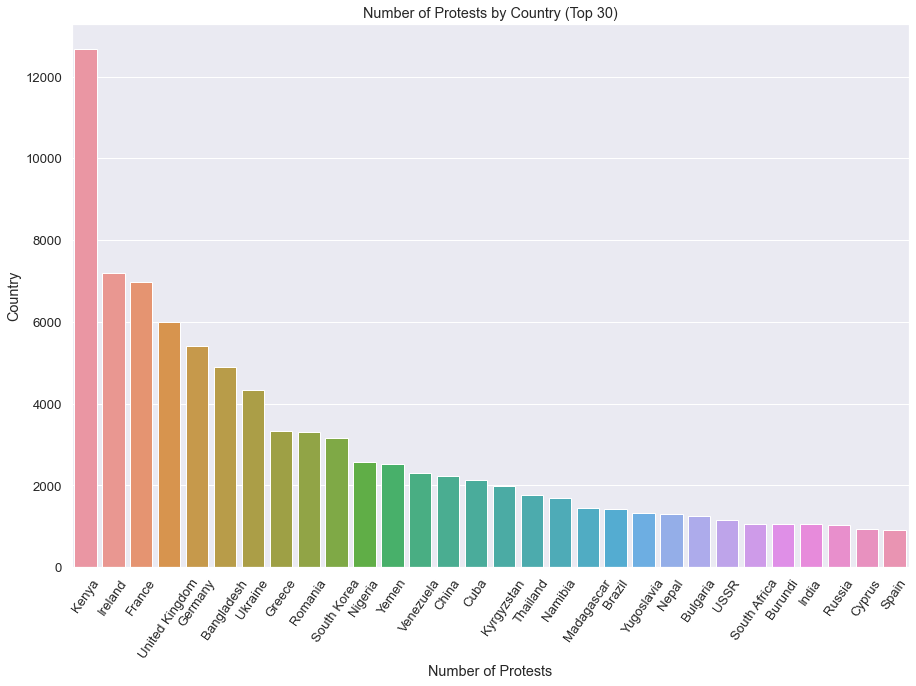

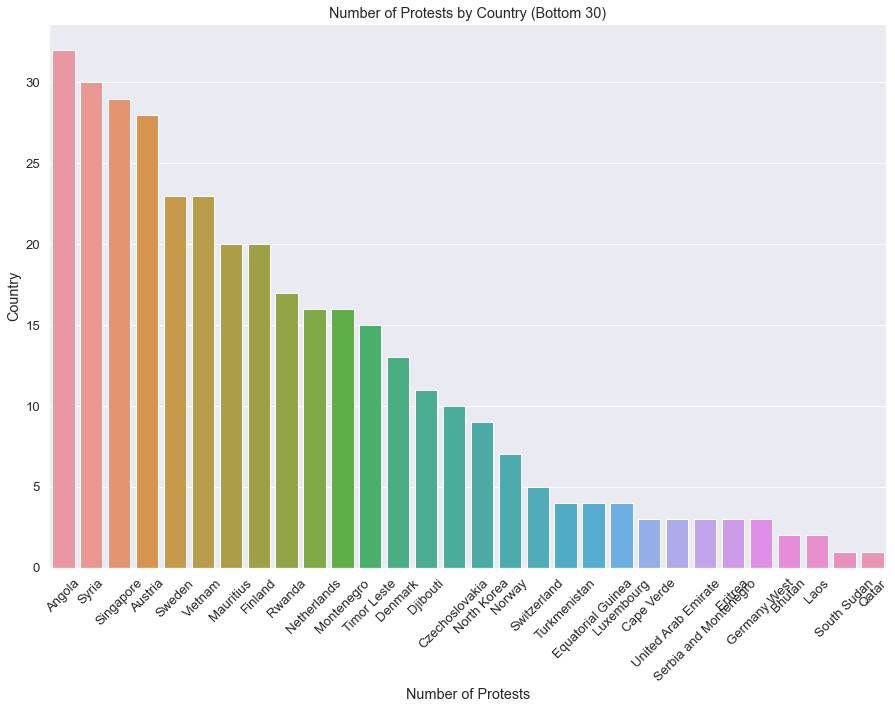

In [10]:
# Seaborn plots to show the Top 30 and Bottom 30 Countries in relation to the amount of protests held overall
sns.set(font_scale=1.2)
plt.figure(figsize=(15,10))
sns.barplot(data=df.groupby('country')[['protestnumber']].sum().sort_values(by='protestnumber', ascending=False).head(30),
            x=df.groupby('country')[['country','protestnumber']].sum().sort_values(by='protestnumber', ascending=False).index[0:30],
            y='protestnumber')
plt.xlabel('Number of Protests')
plt.ylabel('Country')
plt.xticks(rotation=55)
plt.title('Number of Protests by Country (Top 30)');


sns.set(font_scale=1.2)
plt.figure(figsize=(15,10))
sns.barplot(data=df.groupby('country')[['protestnumber']].sum().sort_values(by='protestnumber', ascending=False).tail(30),
            x=df.groupby('country')[['country','protestnumber']].sum().sort_values(by='protestnumber', ascending=False).index[-30::],
            y='protestnumber')
plt.xlabel('Number of Protests')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.title('Number of Protests by Country (Bottom 30)');

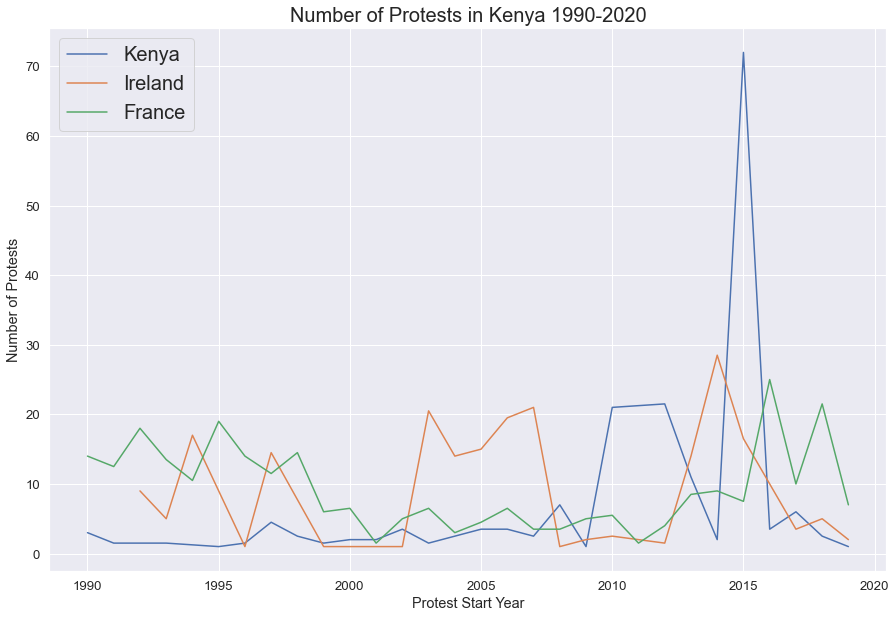

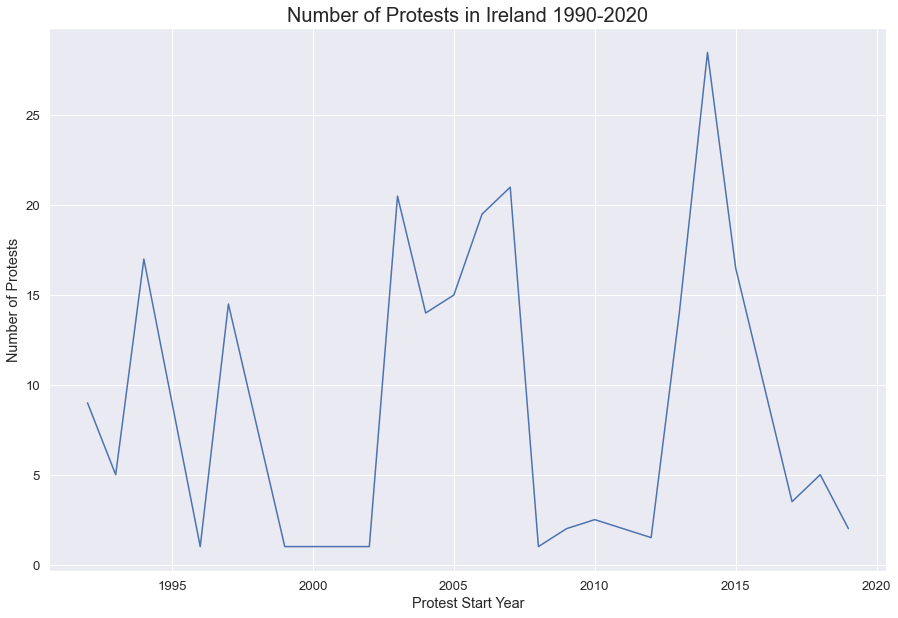

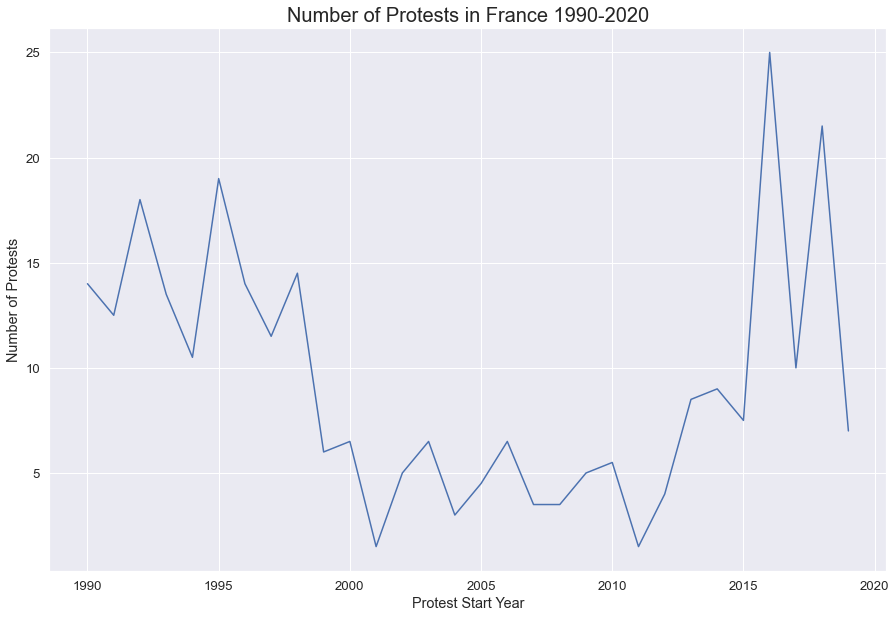

In [11]:
# Creating some dataframes for specific countriee and plotting the differences in amount of protests

uk_df = df[df['country']=='Kenya']
ire_df = df[df['country']=='Ireland']
fra_df = df[df['country']=='France']

sns.set(font_scale=1.2)
plt.figure(figsize=(15,10))
sns.lineplot(data=uk_df, x='startyear', y='protestnumber', ci=None, label='Kenya')
sns.lineplot(data=ire_df, x='startyear', y='protestnumber', ci=None, label='Ireland')
sns.lineplot(data=fra_df, x='startyear', y='protestnumber', ci=None, label='France')
plt.xlabel('Protest Start Year')
plt.ylabel('Number of Protests')
plt.title('Number of Protests in Kenya 1990-2020', fontsize=20)
plt.legend(fontsize=20);

sns.set(font_scale=1.2)
plt.figure(figsize=(15,10))
sns.lineplot(data=ire_df, x='startyear', y='protestnumber', ci=None)
plt.xlabel('Protest Start Year')
plt.ylabel('Number of Protests')
plt.title('Number of Protests in Ireland 1990-2020', fontsize=20)

sns.set(font_scale=1.2)
plt.figure(figsize=(15,10))
sns.lineplot(data=fra_df, x='startyear', y='protestnumber', ci=None)
plt.xlabel('Protest Start Year')
plt.ylabel('Number of Protests')
plt.title('Number of Protests in France 1990-2020', fontsize=20);


**Since 2015, Kenya has experienced shortages of the staple food, maize, and other basic commodities such as sugar, leading to political and social tensions** Resource: (https://www.climatechangenews.com/2017/07/26/kenyas-food-crisis-drought-raises-prices-political-tensions/)

**The anti-austerity movement in Ireland saw majkor demonstrations from 2008 (the year of the Irish economic downturn) to 2015. Between 2008-2015, the Irish Stock Exchange crashed, country fell into recession, unemployment rate jumped record high, and etc. The slumping economy contributed to rise of political and social tensions which led to increase in demonstrations and protests** Resource: https://en.wikipedia.org/wiki/Anti-austerity_movement_in_Ireland

**This actually happened globally around 2008, which is why we determined not to focus on specific countries**



In [12]:
# COUNT VECTORIZED INFO AND GRAPHS - didn't find this extreemly useful in the end

In [13]:
X = df['notes']

cv = CountVectorizer(stop_words='english')
X_cv = cv.fit_transform(X)
X_cv_1 = pd.DataFrame(X_cv.todense(), columns=cv.get_feature_names())


Text(0.5, 1.0, 'Bottom 30 Words')

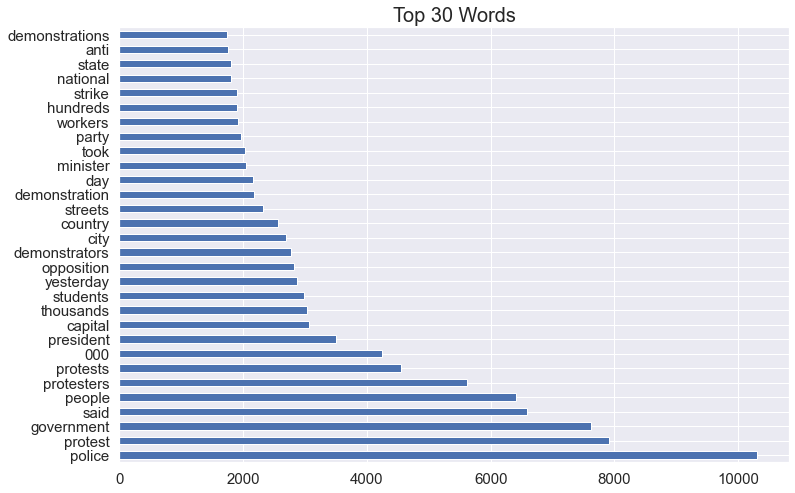

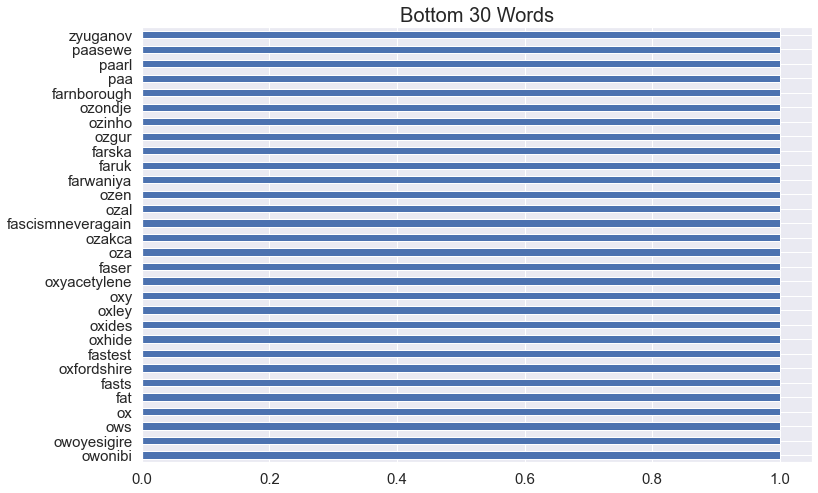

In [14]:
plt.figure(figsize=(12,8))
X_cv_1.sum().sort_values(ascending=False).head(30).plot(kind='barh')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Top 30 Words', fontsize=20)

plt.figure(figsize=(12,8))
X_cv_1.sum().sort_values(ascending=False).tail(30).plot(kind='barh')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Bottom 30 Words', fontsize=20)


C:\Users\Burger\anaconda3\envs\dsi\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


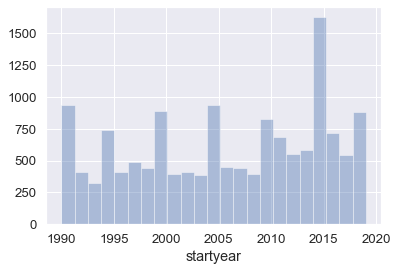

In [15]:
# Showing start and end year - as they were nearly identical, we ultimately chose not to use this graph as we already have a boxplot with this info
sns.distplot(df['startyear'], kde=False);

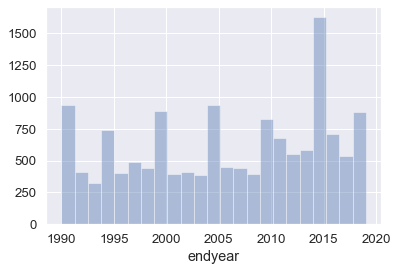

In [16]:
sns.distplot(df['endyear'], kde=False);

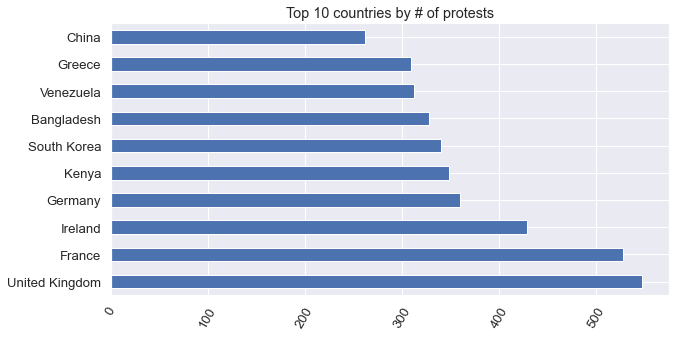

In [17]:
# Top 10 Countries by # of protests
df['country'].value_counts().head(10).plot(kind='barh',figsize=(10, 5),
                                           title='Top 10 countries by # of protests');

plt.xticks(rotation=60);

<AxesSubplot:title={'center':'Protest amount by region'}>

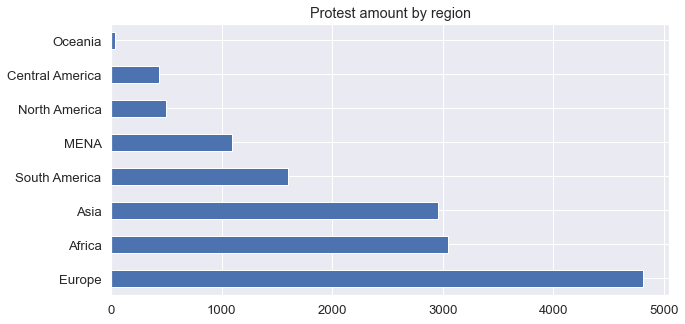

In [18]:
# Protest amounts by region
df['region'].value_counts().head(10).plot(kind='barh',figsize=(10 , 5),
                                           title='Protest amount by region')

In [19]:
# Totals per region (with Oceania not removed yet)
df['region'].value_counts()

Europe             4806
Africa             3043
Asia               2957
South America      1597
MENA               1093
North America       498
Central America     436
Oceania              38
Name: region, dtype: int64

In [20]:
# creating dataframes for each Region, showing protest number and violence

In [21]:
# Creating dataframe from original protests.csv to split up into regions
df2 = pd.read_csv('protests.csv')

In [22]:
dfna = df2[df2.region == 'North America']

In [23]:
dfeu = df2[df2.region == 'Europe']

In [24]:
dfaf = df2[df2.region == 'Africa']

In [25]:
dfas = df2[df2.region == 'Asia']

In [26]:
dfsa = df2[df2.region == 'South America']

In [27]:
dfca = df2[df2.region == 'Central America']

In [28]:
dfmena = df2[df2.region == 'MENA']

In [29]:
dfna.columns

Index(['id', 'country', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear',
       'protesterviolence', 'location', 'participants_category',
       'participants', 'protesteridentity', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7', 'sources',
       'notes'],
      dtype='object')

In [30]:
# showing demands and state responses, visually:

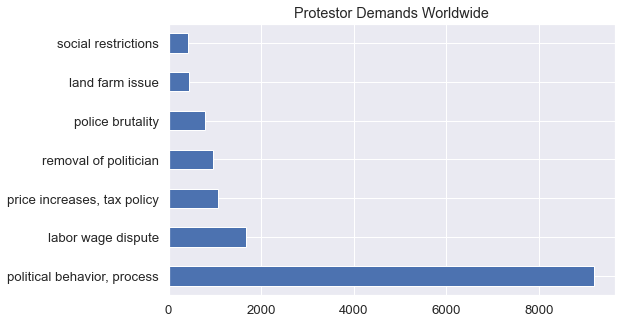

In [31]:
df2['protesterdemand1'].value_counts().plot(kind = 'barh', figsize=(8, 5), 
                                       title='Protestor Demands Worldwide');

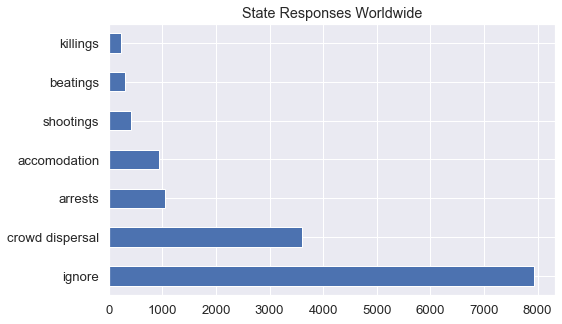

In [32]:
df2['stateresponse1'].value_counts().plot(kind = 'barh',
                                        figsize=(8, 5), 
                                       title='State Responses Worldwide');

In [33]:
df = pd.read_csv('protests.csv')

In [34]:
# Creating dataframe of only Non-Violent protests
dfv0 = df2[df2.protesterviolence == 0]

In [35]:
# Creating dataframe of only Violent protests
dfv1 = df2[df2.protesterviolence == 1]

In [36]:
# GETTING THE TOTALS OF EACH STATE RESPONSE FOR EVERY REGION TO EVENTUALLY ADD TOGETHER TO PUT INTO PIE GRAPHS

In [37]:
dfv0['stateresponse1'].value_counts()

ignore             7380
crowd dispersal    1514
accomodation        815
arrests             624
shootings           161
beatings            107
killings             74
Name: stateresponse1, dtype: int64

In [38]:
dfv0['stateresponse2'].value_counts()

crowd dispersal    229
accomodation       226
arrests            210
beatings           158
killings           108
shootings           86
ignore              22
Name: stateresponse2, dtype: int64

In [39]:
dfv0['stateresponse3'].value_counts()

arrests            75
crowd dispersal    68
killings           34
accomodation       22
beatings           21
shootings          16
ignore              4
Name: stateresponse3, dtype: int64

In [40]:
dfv0['stateresponse4'].value_counts()

crowd dispersal    13
accomodation       12
arrests             8
killings            7
beatings            6
shootings           4
Name: stateresponse4, dtype: int64

In [41]:
dfv0['stateresponse5'].value_counts()

.                  594
accomodation         3
arrests              3
crowd dispersal      1
beatings             1
killings             1
Name: stateresponse5, dtype: int64

**7556 - ignore**
**1825 - crowd disperal**
**1078 - accomodation**
**887 - arrests**
**267 - shootings**
**373 - Beatings**
**223 - Killings**

Totals for Non-Violent: 7556, 1825, 1078, 887, 267, 373, 2230 / Ignore, Crowd Dispersal, Accomodations, Arrests, Shootings, Beatings, Killings, 

In [42]:
dfv1['stateresponse1'].value_counts()

crowd dispersal    2098
ignore              554
arrests             425
shootings           254
beatings            193
killings            162
accomodation        122
Name: stateresponse1, dtype: int64

In [43]:
dfv1['stateresponse2'].value_counts()

arrests            482
crowd dispersal    339
shootings          274
beatings           212
killings           203
accomodation       156
ignore              11
Name: stateresponse2, dtype: int64

In [44]:
dfv1['stateresponse3'].value_counts()

killings           141
crowd dispersal    139
arrests            139
accomodation        70
beatings            59
shootings           56
ignore               6
Name: stateresponse3, dtype: int64

In [45]:
dfv1['stateresponse4'].value_counts()

accomodation       52
arrests            42
killings           31
crowd dispersal    27
shootings          15
beatings           13
Name: stateresponse4, dtype: int64

In [46]:
dfv1['stateresponse5'].value_counts()

.                  150
accomodation        13
arrests             11
crowd dispersal      8
killings             6
shootings            3
beatings             2
Name: stateresponse5, dtype: int64

**3411 - crowd dispersal**
**571 - ignore**
**1081 - arrests**
**541 - shootings**
**479 - beating**
**543 - killings**
**413 - accomodations**

Totals where there was violence: 3411, 571, 1081, 541, 479, 543, 413 / Crowd Dispersal, Ignore, Arrests, Shootings, Beatings, Killings, Accomodations

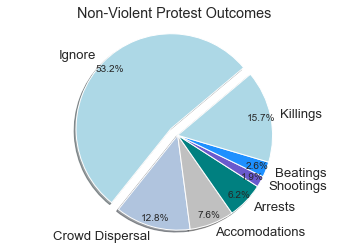

In [47]:
# Creating non-violent pie chart showing state responses from totals abovve
Regions = [7556, 1825, 1078, 887, 267, 373, 2230]

my_labels = 'Ignore', 'Crowd Dispersal', 'Accomodations', 'Arrests', 'Shootings', 'Beatings', 'Killings'
my_colors = ['lightblue','lightsteelblue','silver', 'teal', 'slateblue', 'dodgerblue']
my_explode = (0.1, 0, 0, 0, 0, 0, 0)
plt.rcParams['font.size'] = 10
plt.pie(Regions, labels=my_labels, autopct='%1.1f%%',pctdistance=.9, labeldistance=1.1, startangle=40, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Non-Violent Protest Outcomes')
plt.axis('equal')
plt.show()

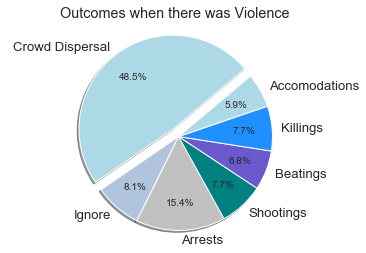

In [48]:
# Creating violent pie chart showing state responses from totals abovve

Regions = [3411, 571, 1081, 541, 479, 543, 413]

my_labels = 'Crowd Dispersal', 'Ignore', 'Arrests', 'Shootings', 'Beatings', 'Killings', 'Accomodations'
my_explode = (0.1, 0, 0, 0, 0, 0, 0)
plt.pie(Regions, labels=my_labels, autopct='%1.1f%%', startangle=40, pctdistance=.7, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Outcomes when there was Violence')
plt.axis('equal')
plt.show()

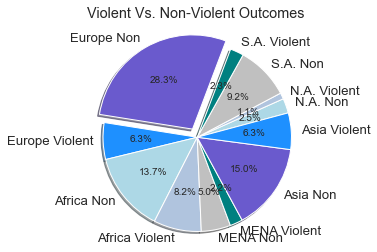

In [49]:
# Violent vs. Non-Violent outcomes -- as this was too busy, we went with the above graphs
Regions = [351, 147, 1275, 322, 3930, 876, 1905, 1138, 700, 303, 2086, 871]

my_labels = 'N.A. Non','N.A. Violent','S.A. Non', 'S.A. Violent', 'Europe Non', 'Europe Violent', 'Africa Non', 'Africa Violent', 'MENA Non', 'MENA Violent','Asia Non','Asia Violent'
my_colors = ['lightblue','lightsteelblue','silver', 'teal', 'slateblue', 'dodgerblue']
my_explode = (0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0)
plt.pie(Regions, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Violent Vs. Non-Violent Outcomes')
plt.axis('equal')
plt.show()

In [50]:
# Getting totals for graphs:

In [51]:
dfna['protesterviolence'].value_counts()

0.0    353
1.0    147
Name: protesterviolence, dtype: int64

In [52]:
dfsa['protesterviolence'].value_counts()

0.0    1300
1.0     324
Name: protesterviolence, dtype: int64

In [53]:
dfeu['protesterviolence'].value_counts()

0.0    3943
1.0     876
Name: protesterviolence, dtype: int64

In [54]:
dfaf['protesterviolence'].value_counts()

0.0    1905
1.0    1138
Name: protesterviolence, dtype: int64

In [55]:
dfmena['protesterviolence'].value_counts()

0.0    1053
1.0     303
Name: protesterviolence, dtype: int64

In [56]:
dfas['protesterviolence'].value_counts()

0.0    2330
1.0     878
Name: protesterviolence, dtype: int64

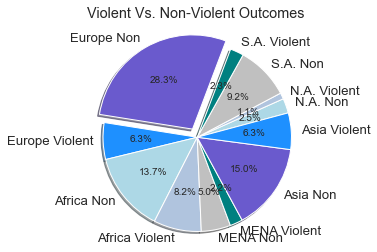

In [57]:
import matplotlib.pyplot as plt

# Creating pie-chart showing violent/non-violent protest amounts based on above data
# ended up not being used

Regions = [351, 147, 1275, 322, 3930, 876, 1905, 1138, 700, 303, 2086, 871]

my_labels = 'N.A. Non','N.A. Violent','S.A. Non', 'S.A. Violent', 'Europe Non', 'Europe Violent', 'Africa Non', 'Africa Violent', 'MENA Non', 'MENA Violent','Asia Non','Asia Violent'
my_colors = ['lightblue','lightsteelblue','silver', 'teal', 'slateblue', 'dodgerblue']
my_explode = (0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0)
plt.pie(Regions, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Violent Vs. Non-Violent Outcomes')
plt.axis('equal')
plt.show()

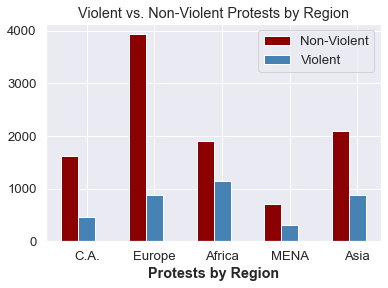

In [58]:
# Creating barchart to show violent/non-violent protests by regions used:

# height and width of bars based on above data (combining N.A. and S.A. into C.A.)
barWidth = 0.25

non = [1626, 3930, 1905, 700, 2086]
vio = [469, 876, 1138, 303, 871]
 
# Set position of bars on X axis
r1 = np.arange(len(non))
r2 = [x + barWidth for x in r1]
 
# Plotting
plt.bar(r1, non, color='darkred', width=barWidth, edgecolor='white', label='Non-Violent')
plt.bar(r2, vio, color='steelblue', width=barWidth, edgecolor='white', label='Violent')
 
# Adding the xticks/labels
plt.xlabel('Protests by Region', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(non))], ['C.A.', 'Europe', 'Africa', 'MENA', 'Asia'])
 
# Creating a Legend and displaying graph
plt.title('Violent vs. Non-Violent Protests by Region')
plt.legend()
plt.show()